In [1]:
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy.ndimage as nd
from scipy.ndimage import grey_opening, binary_dilation, median_filter
from skimage.util import img_as_uint
from astropy.modeling import models, fitting

def fill(data, invalid=None):
    """
    Replace the value of invalid 'data' cells (indicated by 'invalid') 
    by the value of the nearest valid data cell

    Input:
        data:    numpy array of any dimension
        invalid: a binary array of same shape as 'data'. True cells set where data
                 value should be replaced.
                 If None (default), use: invalid  = np.isnan(data)

    Output: 
        Return a filled array. 
    """
    #import numpy as np
    #import scipy.ndimage as nd

    if invalid is None: invalid = np.isnan(data)

    ind = nd.distance_transform_edt(invalid, return_distances=False, return_indices=True)
    return data[tuple(ind)]


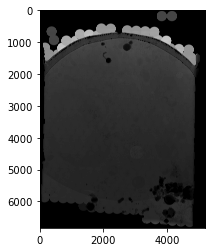

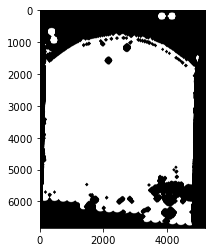

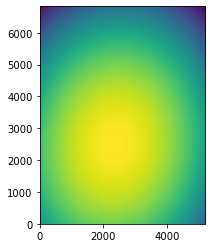

In [9]:
images = glob.glob('/scratch/bern/elferich/deco_lace_manuscript_processing/refined_assembly_it2/???_lamella?_montage_t2.tif')
for image_fn in images[3:4]:
    image = np.int32(imread(image_fn))
    image_filter = median_filter(image,10)
    bright_mask = image_filter > 15000
    bright_mask = binary_dilation(bright_mask, iterations=50)
    dark_mask = image_filter < 1900 
    dark_mask = binary_dilation(dark_mask, iterations=50)


    mask = np.invert(bright_mask | dark_mask)
    plt.imshow(image,cmap="gray")
    plt.show()
    plt.imshow(mask,cmap="gray")
    plt.show()

    y, x = np.mgrid[:image.shape[0], :image.shape[1]]
    p_init = models.Polynomial2D(degree=2)
    fit_p = fitting.LevMarLSQFitter()
    p = fit_p(p_init, x, y, image)
    plt.imshow(p(x, y), origin='lower', interpolation='nearest')


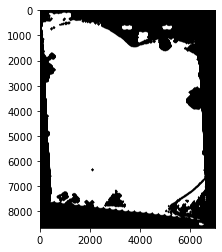

In [3]:
plt.imshow(mask,cmap='gray')

In [4]:
np.mean(image[mask])

4645.018515157083

In [5]:
plt.imshow(masked_image,cmap='gray')

NameError: name 'masked_image' is not defined

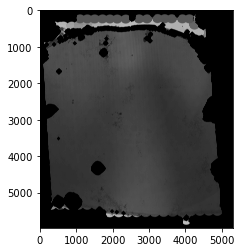

In [ ]:
plt.imshow(image*mask,cmap='gray')

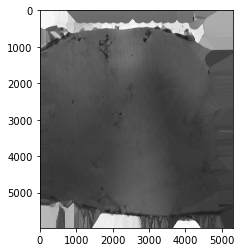

In [ ]:
plt.imshow(opened_image,cmap='gray')

In [ ]:
imsave('/scratch/bern/elferich/deco_lace_manuscript_processing/views/t_opened.tif',nd.gaussian_filter(opened_image,20))

/tmp/ipykernel_84854/971652425.py:1: UserWarning: /scratch/bern/elferich/deco_lace_manuscript_processing/views/t_opened.tif is a low contrast image
  imsave('/scratch/bern/elferich/deco_lace_manuscript_processing/views/t_opened.tif',nd.gaussian_filter(opened_image,20))
